Battery RUL (Remaining Useful Life) Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the battery data set for NASA

In [2]:
import os
import scipy.io

#  Set this to your actual top-level folder
base_path = "/Users/safwanshaikh/Downloads/AML/Battery-RUL-Prediction/Battery_Data_Set"

def extract_discharge_cycles_updated(mat_file_path, key_name):
    data = scipy.io.loadmat(mat_file_path)
    cycles = data[key_name][0][0]['cycle'][0]

    discharge_data = []

    for idx, cycle in enumerate(cycles):
        if cycle['type'][0] != 'discharge':
            continue

        cycle_data = cycle['data']
        voltage = cycle_data['Voltage_measured'][0][0].flatten()
        current = cycle_data['Current_measured'][0][0].flatten()
        temperature = cycle_data['Temperature_measured'][0][0].flatten()
        time_sec = cycle_data['Time'][0][0].flatten()

        try:
            capacity = cycle_data['Capacity'][0][0][0][0]
        except:
            capacity = np.nan

        df = pd.DataFrame({
            'battery_id': key_name,
            'cycle_num': idx + 1,
            'time_sec': time_sec,
            'voltage': voltage,
            'current': current,
            'temperature': temperature,
            'capacity': capacity
        })

        discharge_data.append(df)

    return pd.concat(discharge_data, ignore_index=True) if discharge_data else None

# 🔄 Recursively load all .mat files from subfolders
all_dfs = []

for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".mat") and file.startswith("B"):
            mat_path = os.path.join(root, file)
            key_name = file.split('.')[0]
            try:
                df = extract_discharge_cycles_updated(mat_path, key_name)
                if df is not None:
                    all_dfs.append(df)
            except Exception as e:
                print(f"Error processing {file}: {e}")

# 🔗 Merge all into one DataFrame
merged_df = pd.concat(all_dfs, ignore_index=True) if all_dfs else pd.DataFrame()


Data Exploration

In [3]:
merged_df.shape

(835422, 7)

In [4]:
merged_df.head(10)

,battery_id,cycle_num,time_sec,voltage,current,temperature,capacity
0,B0052,1,0.000,3.839569,0.003881,9.127700,0.860659
1,B0052,1,9.313,3.839317,0.000240,9.109016,0.860659
2,B0052,1,19.406,3.467054,-1.992228,9.069624,0.860659
3,B0052,1,28.797,3.441731,-1.994519,9.091822,0.860659
4,B0052,1,38.141,3.420127,-1.993204,9.126609,0.860659
5,B0052,1,47.563,3.400286,-1.994815,9.175103,0.860659
6,B0052,1,56.953,3.381112,-1.994436,9.215666,0.860659
7,B0052,1,66.235,3.362287,-1.995251,9.279857,0.860659
8,B0052,1,75.625,3.343357,-1.993564,9.388372,0.860659
9,B0052,1,85.000,3.324146,-1.991669,9.453485,0.860659


In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835422 entries, 0 to 835421
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   battery_id   835422 non-null  object 
 1   cycle_num    835422 non-null  int64  
 2   time_sec     835422 non-null  float64
 3   voltage      835422 non-null  float64
 4   current      835422 non-null  float64
 5   temperature  835422 non-null  float64
 6   capacity     830026 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 44.6+ MB


In [6]:
merged_df.describe()

,cycle_num,time_sec,voltage,current,temperature,capacity
count,835422.000000,835422.000000,835422.000000,835422.000000,835422.000000,830026.000000
mean,147.165454,1983.882216,3.422200,-1.536301,27.690855,1.459198
std,141.900422,1472.518834,0.410522,1.211351,13.619596,0.370423
min,1.000000,0.000000,0.192738,-4.038796,2.904756,0.000000
25%,42.000000,825.875000,3.284805,-2.010638,12.387256,1.292408
50%,91.000000,1710.515000,3.469811,-1.988676,30.326697,1.525268
75%,221.000000,2742.312000,3.665822,-0.992897,35.985494,1.759836
max,614.000000,6574.671000,4.542427,0.030461,69.869746,2.640149


In [7]:
merged_df['battery_id'].value_counts()

battery_id
B0007    50285
B0006    50285
B0005    50285
B0033    47065
B0036    47065
B0034    47065
B0018    34866
B0028    32676
B0025    32676
B0027    32676
B0026    32676
B0043    25795
B0044    25795
B0042    25795
B0047    24519
B0048    24519
B0045    24519
B0046    24519
B0054    22665
B0056    22662
B0055    22662
B0040    20201
B0038    20201
B0039    20201
B0041    13519
B0053    11090
B0029     6351
B0032     6351
B0031     6351
B0030     6351
B0050     5934
B0049     5934
B0051     5934
B0052     5934
Name: count, dtype: int64

In [8]:
print(f"Different batteries {merged_df['battery_id'].unique()}")   # .unique() returns a list of all unique values in the specified column
print(f"Number of batteries used: {merged_df['battery_id'].nunique()}")   # .nunique() returns the total number of unique values 

Different batteries ['B0052' 'B0050' 'B0051' 'B0049' 'B0044' 'B0041' 'B0040' 'B0042' 'B0043'
 'B0030' 'B0031' 'B0025' 'B0033' 'B0027' 'B0026' 'B0032' 'B0036' 'B0034'
 'B0039' 'B0038' 'B0028' 'B0029' 'B0047' 'B0046' 'B0045' 'B0048' 'B0053'
 'B0055' 'B0054' 'B0056' 'B0018' 'B0005' 'B0006' 'B0007']
Number of batteries used: 34


In [9]:
merged_df['cycle_num'].nunique()

425

In [10]:
summary_df = merged_df.groupby(['battery_id', 'cycle_num'])['capacity'].first().reset_index()

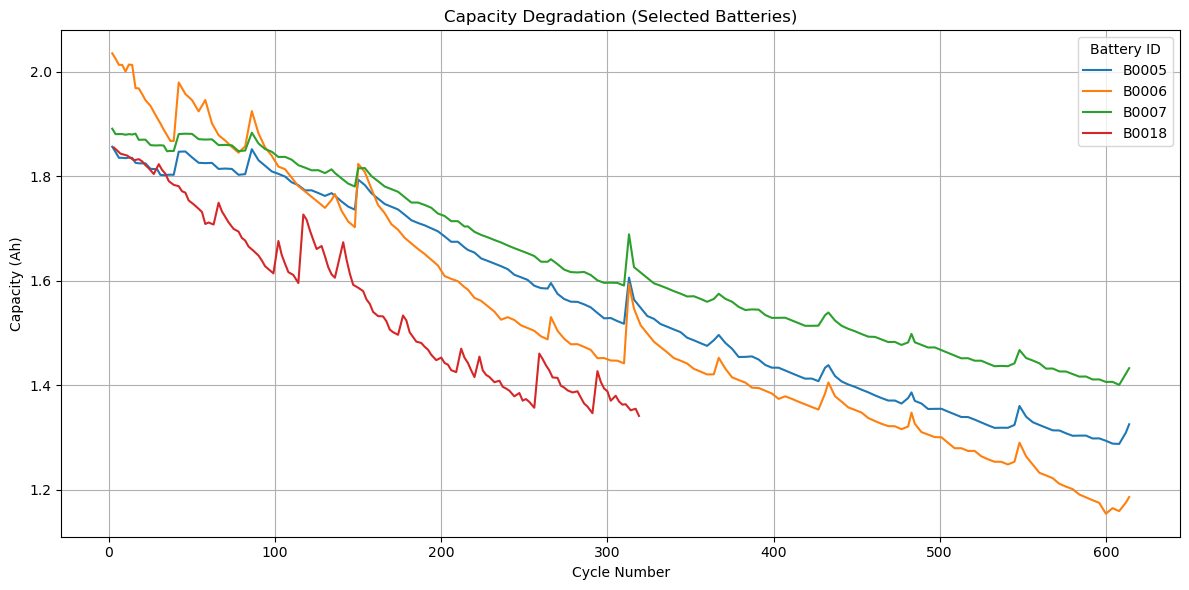

In [11]:
selected_batteries = ['B0005', 'B0006', 'B0007', 'B0018'] 

plt.figure(figsize=(12, 6))

for batt in selected_batteries:
    batt_data = summary_df[summary_df['battery_id'] == batt]
    plt.plot(batt_data['cycle_num'], batt_data['capacity'], label=batt)

plt.title("Capacity Degradation (Selected Batteries)")
plt.xlabel("Cycle Number")
plt.ylabel("Capacity (Ah)")
plt.legend(title='Battery ID')
plt.grid(True)
plt.tight_layout()
plt.show()

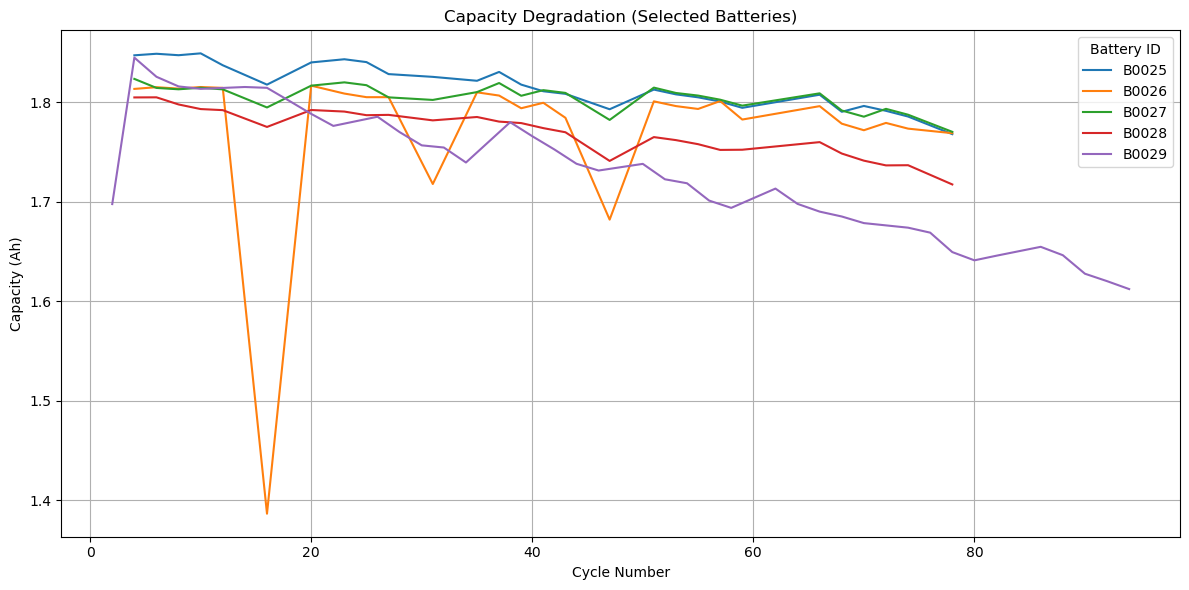

In [12]:
selected_batteries = ['B0025', 'B0026', 'B0027', 'B0028', 'B0029'] 

plt.figure(figsize=(12, 6))

for batt in selected_batteries:
    batt_data = summary_df[summary_df['battery_id'] == batt]
    plt.plot(batt_data['cycle_num'], batt_data['capacity'], label=batt)

plt.title("Capacity Degradation (Selected Batteries)")
plt.xlabel("Cycle Number")
plt.ylabel("Capacity (Ah)")
plt.legend(title='Battery ID')
plt.grid(True)
plt.tight_layout()
plt.show()

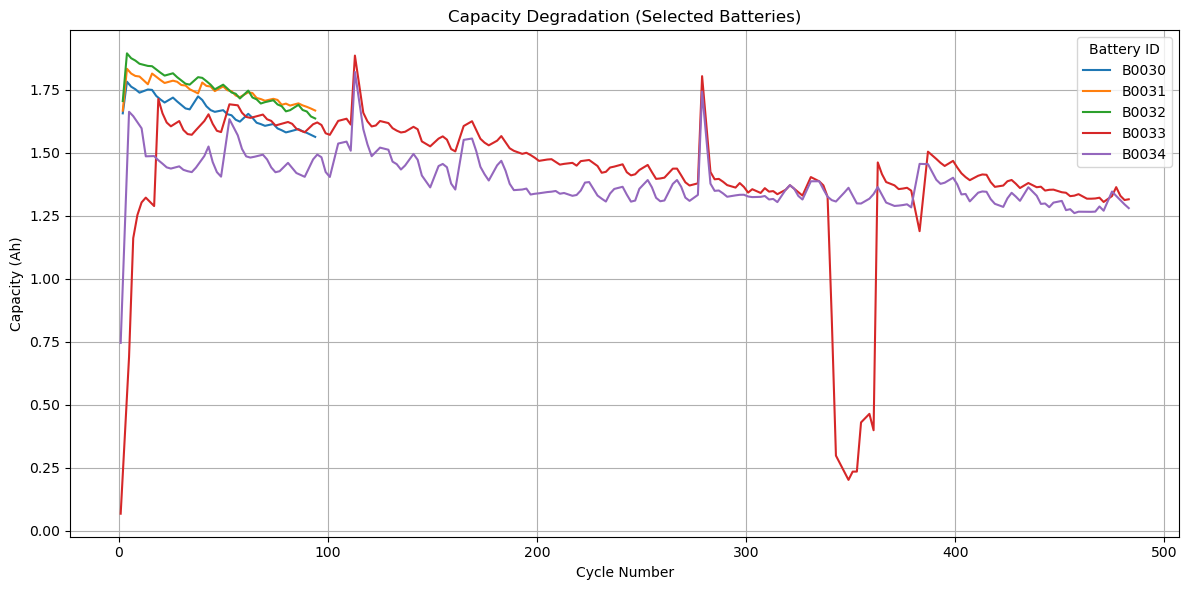

In [13]:
selected_batteries = ['B0030', 'B0031', 'B0032', 'B0033', 'B0034',] 

plt.figure(figsize=(12, 6))

for batt in selected_batteries:
    batt_data = summary_df[summary_df['battery_id'] == batt]
    plt.plot(batt_data['cycle_num'], batt_data['capacity'], label=batt)

plt.title("Capacity Degradation (Selected Batteries)")
plt.xlabel("Cycle Number")
plt.ylabel("Capacity (Ah)")
plt.legend(title='Battery ID')
plt.grid(True)
plt.tight_layout()
plt.show()

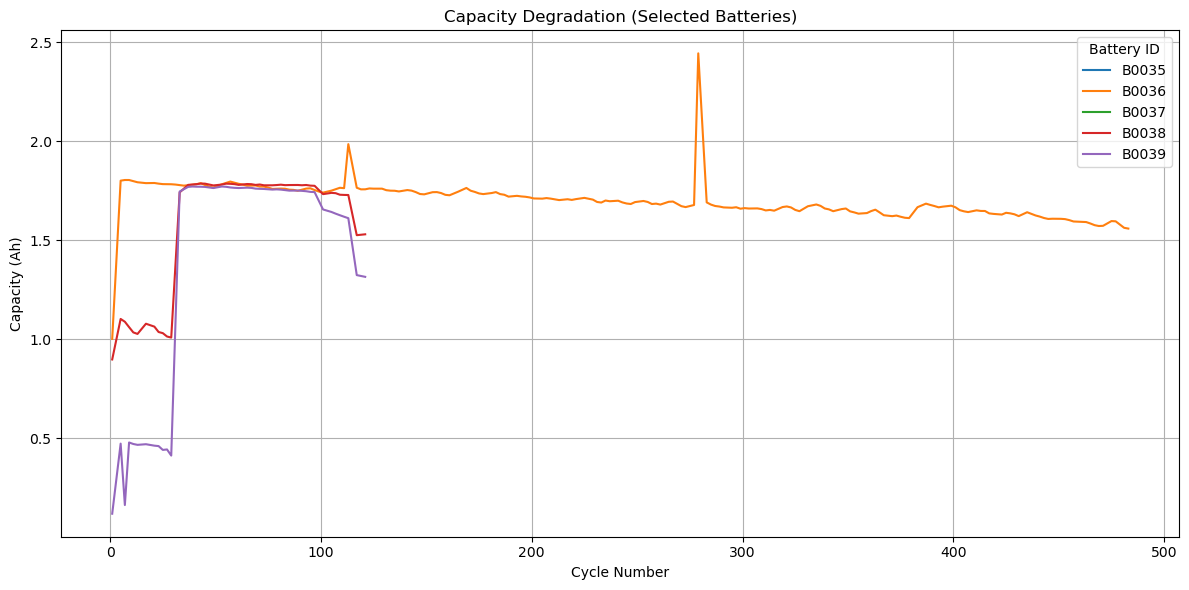

In [14]:
selected_batteries = ['B0035', 'B0036', 'B0037', 'B0038', 'B0039']  

plt.figure(figsize=(12, 6))

for batt in selected_batteries:
    batt_data = summary_df[summary_df['battery_id'] == batt]
    plt.plot(batt_data['cycle_num'], batt_data['capacity'], label=batt)

plt.title("Capacity Degradation (Selected Batteries)")
plt.xlabel("Cycle Number")
plt.ylabel("Capacity (Ah)")
plt.legend(title='Battery ID')
plt.grid(True)
plt.tight_layout()
plt.show()

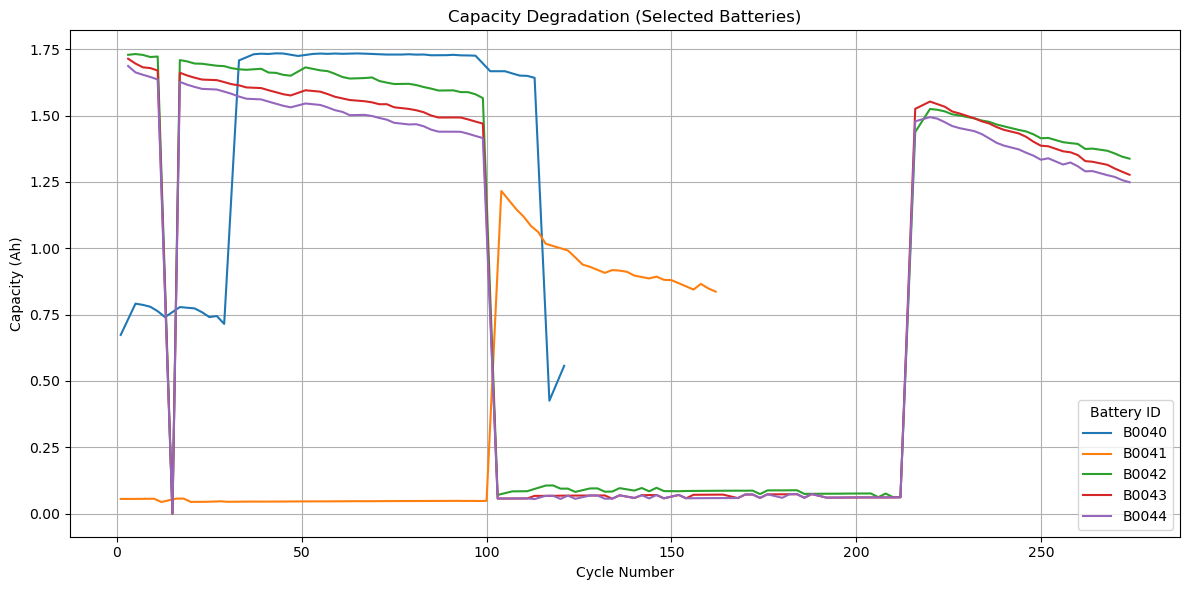

In [15]:
selected_batteries = ['B0040', 'B0041', 'B0042', 'B0043', 'B0044',]  

plt.figure(figsize=(12, 6))

for batt in selected_batteries:
    batt_data = summary_df[summary_df['battery_id'] == batt]
    plt.plot(batt_data['cycle_num'], batt_data['capacity'], label=batt)

plt.title("Capacity Degradation (Selected Batteries)")
plt.xlabel("Cycle Number")
plt.ylabel("Capacity (Ah)")
plt.legend(title='Battery ID')
plt.grid(True)
plt.tight_layout()
plt.show()

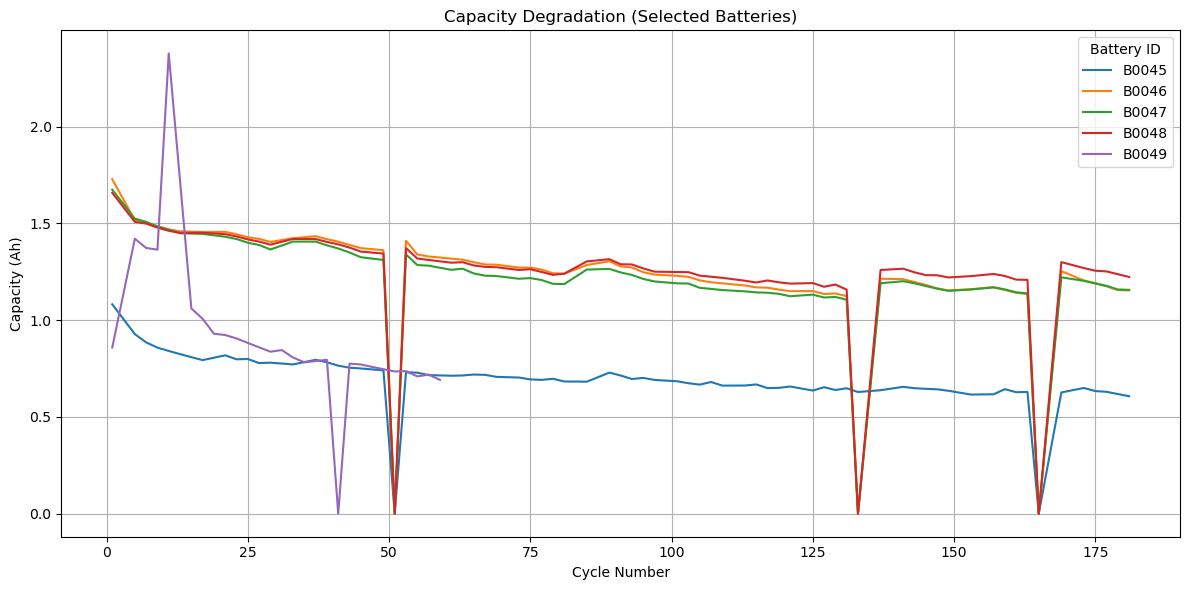

In [16]:
selected_batteries = ['B0045', 'B0046', 'B0047', 'B0048', 'B0049']  

plt.figure(figsize=(12, 6))

for batt in selected_batteries:
    batt_data = summary_df[summary_df['battery_id'] == batt]
    plt.plot(batt_data['cycle_num'], batt_data['capacity'], label=batt)

plt.title("Capacity Degradation (Selected Batteries)")
plt.xlabel("Cycle Number")
plt.ylabel("Capacity (Ah)")
plt.legend(title='Battery ID')
plt.grid(True)
plt.tight_layout()
plt.show()

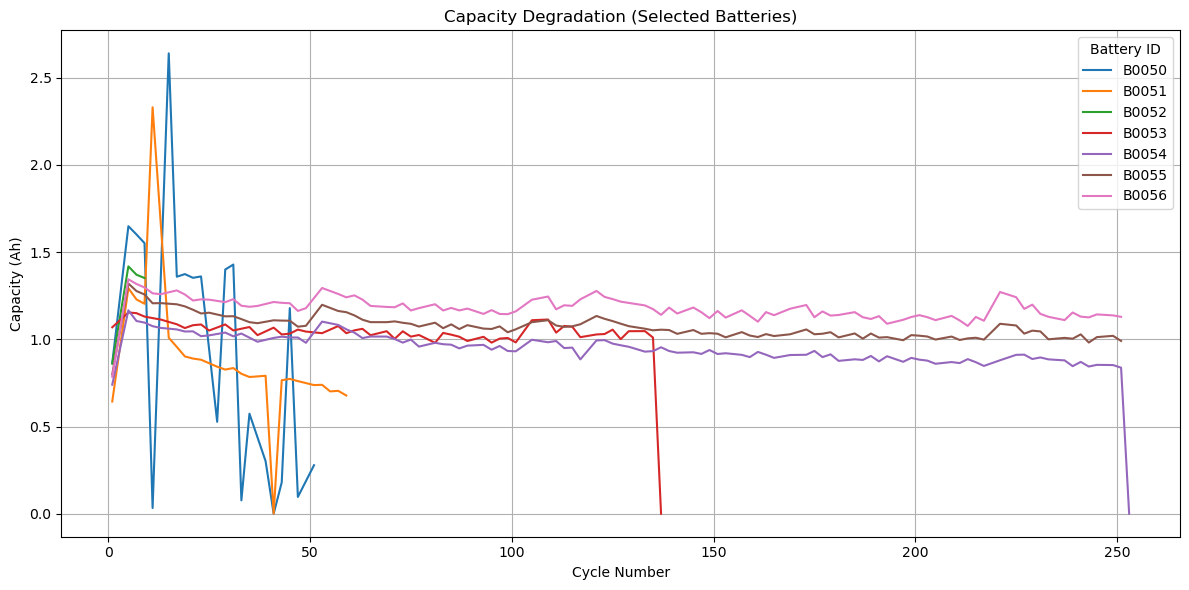

In [17]:
selected_batteries = ['B0050', 'B0051', 'B0052', 'B0053', 'B0054', 'B0055', 'B0056']  

plt.figure(figsize=(12, 6))

for batt in selected_batteries:
    batt_data = summary_df[summary_df['battery_id'] == batt]
    plt.plot(batt_data['cycle_num'], batt_data['capacity'], label=batt)

plt.title("Capacity Degradation (Selected Batteries)")
plt.xlabel("Cycle Number")
plt.ylabel("Capacity (Ah)")
plt.legend(title='Battery ID')
plt.grid(True)
plt.tight_layout()
plt.show()

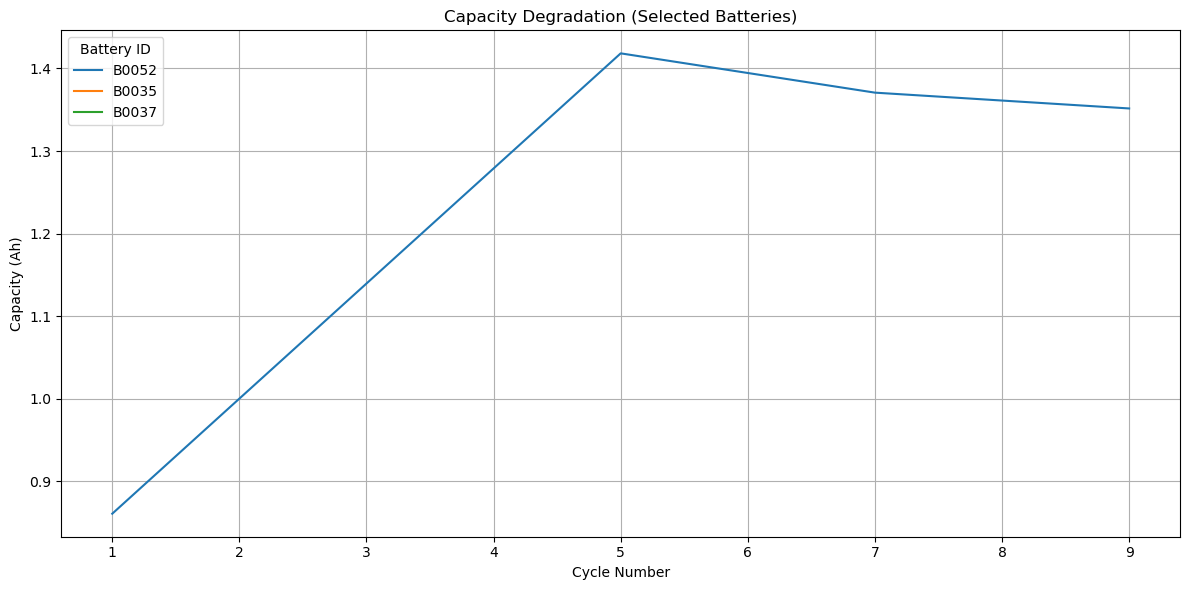

In [18]:
problem_batteries = ['B0052', 'B0035', 'B0037']  

plt.figure(figsize=(12, 6))

for batt in problem_batteries:
    batt_data = summary_df[summary_df['battery_id'] == batt]
    plt.plot(batt_data['cycle_num'], batt_data['capacity'], label=batt)

plt.title("Capacity Degradation (Selected Batteries)")
plt.xlabel("Cycle Number")
plt.ylabel("Capacity (Ah)")
plt.legend(title='Battery ID')
plt.grid(True)
plt.tight_layout()
plt.show()

Checking for missing values

In [19]:
# Check total missing values in each column
print("Missing values per column:\n", merged_df.isnull().sum())

# Check how many rows have any missing values
print("\nTotal rows with missing data:", merged_df.isnull().any(axis=1).sum())

# Preview those rows if needed
missing_rows = merged_df[merged_df.isnull().any(axis=1)]


Missing values per column:
 battery_id        0
cycle_num         0
time_sec          0
voltage           0
current           0
temperature       0
capacity       5396
dtype: int64

Total rows with missing data: 5396


Checking where the missing values are coming

In [20]:
missing_df = merged_df[merged_df['capacity'].isna()]
print("Missing by battery:\n", missing_df['battery_id'].value_counts())
print("Missing by cycle:\n", missing_df.groupby('battery_id')['cycle_num'].nunique())

Missing by battery:
 battery_id
B0052    4769
B0050     627
Name: count, dtype: int64
Missing by cycle:
 battery_id
B0050     4
B0052    21
Name: cycle_num, dtype: int64


Removing missing values

In [21]:
# Step 1: Remove incomplete cycles
clean_cycle_df = merged_df.dropna(subset=['capacity'])

# Step 2 (optional): Remove entire batteries like B0052 if they are mostly incomplete
clean_df = clean_cycle_df[~clean_cycle_df['battery_id'].isin(['B0052'])]
